# Лабораторная робата №5

In [181]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
#  matplotlib.style.use('ggplot')
%matplotlib inline

In [182]:
from sklearn.linear_model import LinearRegression

In [183]:
import os
os.chdir("C:/Users/вячеслав/Desktop/Lect_04/") 

In [184]:
df = pd.read_csv("Chicago_hotels.csv", delimiter = ';', decimal = ',', na_values = ' ')
df.head()

,date1,date2,x1,x2,x3,x4
0,January,1994,44.3,104.04,51.9,72.15
1,February,1994,54.7,102.74,60.1,73.47
2,March,1994,61.9,105.23,65.0,74.91
3,April,1994,69.1,113.63,69.8,79.06
4,May,1994,70.8,120.77,72.4,82.07


In [185]:
print(df['x3'])

0      51.9
1      60.1
2      65.0
3      69.8
4      72.4
       ... 
115     NaN
116     NaN
117     NaN
118     NaN
119     NaN
Name: x3, Length: 120, dtype: float64


Значения в восьми последних строк заменим NaN.

Text(0.5, 1.0, 'Коэффициент загрузки гостиниц в процентах')

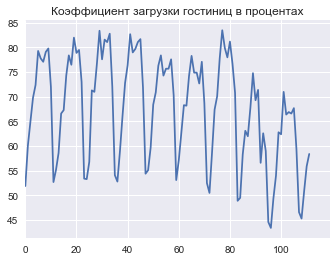

In [186]:
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(121)
df['x3'].plot(ax=ax1)
ax1.set_title(u'Коэффициент загрузки гостиниц в процентах')
#ax1.set_ylabel(u'Проценты')

Видно что характер сезонности аддитивный и тип тренда квадратичный. 

Вывод: будем строить модель линейной регрессии для прогнозирования коэффициента загрузки гостиниц. 
$$y_i = \beta \cdot x_i^2 + c(x_i) + \varepsilon_i,$$
где $y_i$ - коэффициент загрузки, $x_i$ - порядковый номер месяца, $c(x_i)$ - сезонная составляющая, $\varepsilon_i$ - случайный шум.

Создадим предикторы. 

In [187]:
df['month_num'] = range(1, len(df) + 1)
df['month_num_2'] = df['month_num']**2

In [188]:
df.head()

,date1,date2,x1,x2,x3,x4,month_num,month_num_2
0,January,1994,44.3,104.04,51.9,72.15,1,1
1,February,1994,54.7,102.74,60.1,73.47,2,4
2,March,1994,61.9,105.23,65.0,74.91,3,9
3,April,1994,69.1,113.63,69.8,79.06,4,16
4,May,1994,70.8,120.77,72.4,82.07,5,25


Удалим лишнее. 

In [189]:
df_2 = df.drop(columns=["date1", "date2", "x1", "x2","x4"])

In [193]:
df_2.head()

,x3,month_num,month_num_2,m01,m02,m03,m04,m05,m06,m07,m08,m09,m10,m11,m12
0,51.9,1,1,1,0,0,0,0,0,0,0,0,0,0,0
1,60.1,2,4,0,1,0,0,0,0,0,0,0,0,0,0
2,65.0,3,9,0,0,1,0,0,0,0,0,0,0,0,0
3,69.8,4,16,0,0,0,1,0,0,0,0,0,0,0,0
4,72.4,5,25,0,0,0,0,1,0,0,0,0,0,0,0


Добавим индикаторы месяцев.

In [191]:
df_2["m01"] = [1,0,0,0,0,0,0,0,0,0,0,0]*10
df_2["m02"] = [0,1,0,0,0,0,0,0,0,0,0,0]*10
df_2["m03"] = [0,0,1,0,0,0,0,0,0,0,0,0]*10
df_2["m04"] = [0,0,0,1,0,0,0,0,0,0,0,0]*10
df_2["m05"] = [0,0,0,0,1,0,0,0,0,0,0,0]*10
df_2["m06"] = [0,0,0,0,0,1,0,0,0,0,0,0]*10
df_2["m07"] = [0,0,0,0,0,0,1,0,0,0,0,0]*10
df_2["m08"] = [0,0,0,0,0,0,0,1,0,0,0,0]*10
df_2["m09"] = [0,0,0,0,0,0,0,0,1,0,0,0]*10
df_2["m10"] = [0,0,0,0,0,0,0,0,0,1,0,0]*10
df_2["m11"] = [0,0,0,0,0,0,0,0,0,0,1,0]*10
df_2["m12"] = [0,0,0,0,0,0,0,0,0,0,0,1]*10

In [192]:
df_2.head(120)

,x3,month_num,month_num_2,m01,m02,m03,m04,m05,m06,m07,m08,m09,m10,m11,m12
0,51.9,1,1,1,0,0,0,0,0,0,0,0,0,0,0
1,60.1,2,4,0,1,0,0,0,0,0,0,0,0,0,0
2,65.0,3,9,0,0,1,0,0,0,0,0,0,0,0,0
3,69.8,4,16,0,0,0,1,0,0,0,0,0,0,0,0
4,72.4,5,25,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,NaN,116,13456,0,0,0,0,0,0,0,1,0,0,0,0
116,NaN,117,13689,0,0,0,0,0,0,0,0,1,0,0,0
117,NaN,118,13924,0,0,0,0,0,0,0,0,0,1,0,0
118,NaN,119,14161,0,0,0,0,0,0,0,0,0,0,1,0


Удалим 8 последних строк с NaN.

In [177]:
df_2 = df_2.dropna(how='any')
df_2.head(120)

,x3,month_num,month_num_2,m01,m02,m03,m04,m05,m06,m07,m08,m09,m10,m11,m12
0,51.9,1,1,1,0,0,0,0,0,0,0,0,0,0,0
1,60.1,2,4,0,1,0,0,0,0,0,0,0,0,0,0
2,65.0,3,9,0,0,1,0,0,0,0,0,0,0,0,0
3,69.8,4,16,0,0,0,1,0,0,0,0,0,0,0,0
4,72.4,5,25,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,46.6,108,11664,0,0,0,0,0,0,0,0,0,0,0,1
108,45.3,109,11881,1,0,0,0,0,0,0,0,0,0,0,0
109,50.8,110,12100,0,1,0,0,0,0,0,0,0,0,0,0
110,55.9,111,12321,0,0,1,0,0,0,0,0,0,0,0,0


Подгоняем нашу модель. 

In [152]:
y = df_2['x3']
X = df_2.drop(columns=["x3", "m03"])
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Заодно посмотрим на коэффициент детерминации. 

In [153]:
print('R^2: {0}'.format(model.score(X, y)))

R^2: 0.9336494770148978


In [154]:
from scipy import stats

def regression_coef(model, X, y):
    coef = pd.DataFrame(list(zip(['intercept'] + X.columns.tolist(), [model.intercept_] + model.coef_.tolist())),
                    columns=['predictor', 'coef'])
    X1 = np.append(np.ones((len(X),1)), X, axis=1)
    b = np.append(model.intercept_, model.coef_)
    MSE = np.sum((model.predict(X) - y) ** 2, axis=0) / float(X.shape[0] - X.shape[1])
    var_b = MSE * (np.linalg.inv(np.dot(X1.T, X1)).diagonal())
    sd_b = np.sqrt(var_b)
    t = b / sd_b
    coef['pvalue'] = [2 * (1 - stats.t.cdf(np.abs(i), (len(X1) - 1))) for i in t]
    return coef

Коэффициенты модели и проверка гипотез для них:

In [155]:
regression_coef(model, X, y)

,predictor,coef,pvalue
0,intercept,65.360710,0.000000e+00
1,month_num,0.188256,3.199880e-07
2,month_num_2,-0.002588,3.108624e-14
3,m01,-13.403117,0.000000e+00
4,m02,-7.304146,1.567431e-07
5,m04,2.829321,3.217972e-02
6,m05,7.570042,1.303661e-07
7,m06,13.369774,0.000000e+00
8,m07,9.674680,7.205858e-11
9,m08,11.062540,3.674838e-13


Сравним подгонку и наши изначальные данные. 

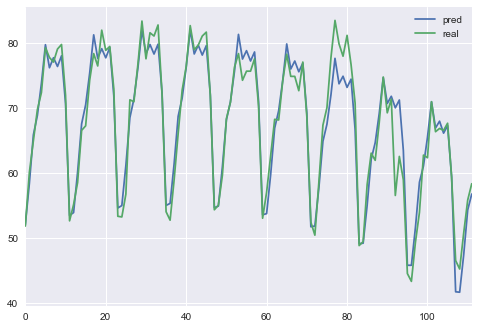

In [178]:
pred = pd.DataFrame({
    'pred': model.predict(X),
    'real': y})
pred.plot()

Начинаем прогнозирование, дял этого готовим матрицу значений предикторов df_3 для вычисления прогнозов на 8 месяцев вперед. 

In [157]:
df_3 = pd.DataFrame()
df_3['month_num'] = range(112, 120)
df_3['month_num2'] = df_3['month_num']**2

Добавляем индикаторы.

In [158]:
df_3["m01"] = [0,0,0,0,0,0,0,0]
df_3["m02"] = [0,0,0,0,0,0,0,0]
df_3["m04"] = [0,0,0,0,0,0,0,0]
df_3["m05"] = [1,0,0,0,0,0,0,0]
df_3["m06"] = [0,1,0,0,0,0,0,0]
df_3["m07"] = [0,0,1,0,0,0,0,0]
df_3["m08"] = [0,0,0,1,0,0,0,0]
df_3["m09"] = [0,0,0,0,1,0,0,0]
df_3["m010"] = [0,0,0,0,0,1,0,0]
df_3["m011"] = [0,0,0,0,0,0,1,0]
df_3["m012"] = [0,0,0,0,0,0,0,1]

In [159]:
df_3.head()

,month_num,month_num2,m01,m02,m04,m05,m06,m07,m08,m09,m010,m011,m012
0,112,12544,0,0,0,1,0,0,0,0,0,0,0
1,113,12769,0,0,0,0,1,0,0,0,0,0,0
2,114,12996,0,0,0,0,0,1,0,0,0,0,0
3,115,13225,0,0,0,0,0,0,1,0,0,0,0
4,116,13456,0,0,0,0,0,0,0,1,0,0,0


In [160]:
model.predict(df_3)

array([61.55620535, 66.96197574, 62.86774613, 63.8512943 , 61.95706469,
       63.04061285, 55.14638324, 37.40770919])

Готовимся к построению графика. 

In [161]:
y1 = model.predict(df_3)
pred['forecast'] = np.nan
pred.head()

,pred,real,forecast
0,52.143262,51.9,NaN
1,58.422726,60.1,NaN
2,65.902191,65.0,NaN
3,68.901655,69.8,NaN
4,73.807344,72.4,NaN


In [162]:
df_4 = pd.DataFrame(model.predict(df_3), columns=['forecast'])
df_4['real'] = np.nan
df_4['pred'] = np.nan

In [163]:
df_4.head()

,forecast,real,pred
0,61.556205,NaN,NaN
1,66.961976,NaN,NaN
2,62.867746,NaN,NaN
3,63.851294,NaN,NaN
4,61.957065,NaN,NaN


Объединяем матрицы, задаем новые индексы

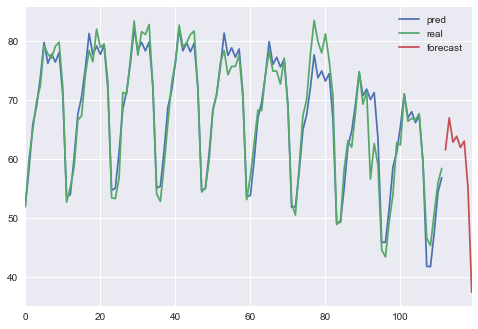

In [169]:
pred_1 = pd.concat(
    [pred, df_4],
    sort=False
).reset_index(drop=True)

pred_1.plot()

Посмотрим еще раз на наш график с прогнозом. 

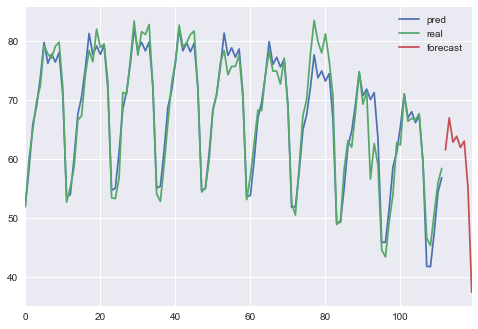

In [171]:
matplotlib.style.use('seaborn')
pred_1.plot()